# Weekly Project: Predicting Boston Housing prices

In this project, you will create, evaluate the performance and predictive power of your model on data collected from homes in suburbs of Boston, Massachusetts

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. **Data preprocessing has been applied to your dataset**. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Your task is to apply a machine learning model of your choice to predict the price of houses in a Boston neighborhood (which is column 'MEDV')


The dataset can be accessed here: https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv


Here are the few steps you can follow

***IMPORT***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline

sns.set_style("whitegrid")
np.random.seed(42)

In [ ]:
#Read file csv:
df = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv')
df.index += 1
df

,RM,LSTAT,PTRATIO,MEDV
1,6.575,4.98,15.3,504000.0
2,6.421,9.14,17.8,453600.0
3,7.185,4.03,17.8,728700.0
4,6.998,2.94,18.7,701400.0
5,7.147,5.33,18.7,760200.0
...,...,...,...,...
485,6.593,9.67,21.0,470400.0
486,6.120,9.08,21.0,432600.0
487,6.976,5.64,21.0,501900.0
488,6.794,6.48,21.0,462000.0


In [ ]:
# Define features & label
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 1 to 489
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06




# Step 1: Data Exploration (EDA)

Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**Question**: For each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each by plotting or calculating the correlation

***Answer:***
- **RM**: adding an additional room to a house will increase its price. A house with more rooms tend to be bigger, and also has more value compared to smaller house with fewer rooms. The number of rooms is positvely proportional to housing price (corr = 0.697)

- **LSTAT**: a house located in a wealthy neighbourhood is more desirable than the same one located in a neighbourhood with greater percentage of 'lower class' due to its safe surroundings, better access to schools, restaurants, parks, entertainment centers, etc. LSTAT is negatively proportional to the house price (corr = -0.76)

- **PTRATIO**: A lower PTRATIO means students would get better personal instruction and attention from the teacher, which can have a great impact on how successful the students would perform academically. Therefore, it's more desirable to buy a house in a neighbourhood with low PTRATIO. PTRATIO is also negatively proportional to house price (corr = -0.519)

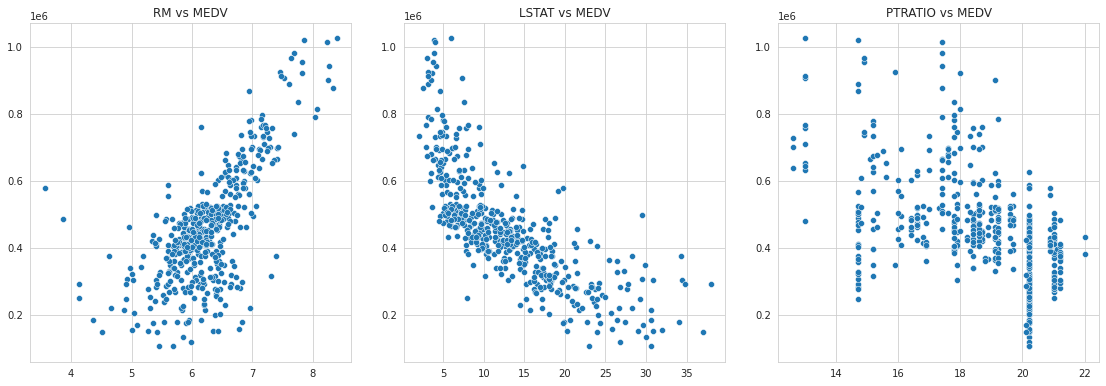

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(16,6))

for i in range(3):
  sns.scatterplot(x=df[df.columns[i]].values, y=df['MEDV'].values, ax=ax[i])

ax[0].set_title('RM vs MEDV')
ax[1].set_title('LSTAT vs MEDV')
ax[2].set_title('PTRATIO vs MEDV')
plt.tight_layout(pad=3)
plt.show()

In [ ]:
df.corr().style.background_gradient(cmap='Reds')

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


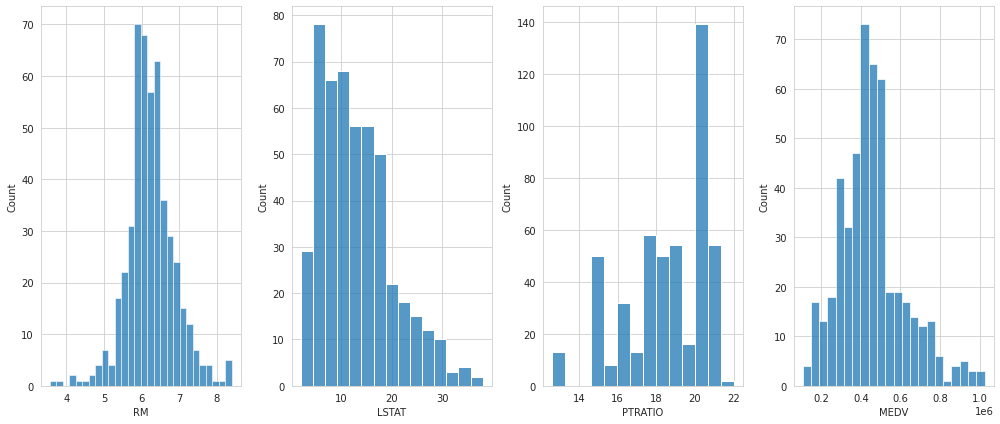

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(14,6))
i = 0

for k,v in df.items():
    sns.histplot(data=v, ax=ax[i])
    i += 1

plt.tight_layout()
plt.show()



# Step 2: Get to know our performance Metric

Do a quick read on Mean Absolute Error (MAE), because that is going to be the metric we are going to use for this task.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

**Question**: Calculate MAE on these data points by using the Sklearn library
```python
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
```
If a model is making these prediction (y_pred), is this a good model?

In [ ]:
y_true = np.array([3, -0.5, 2, 7, 4.2])
y_pred = np.array([2.5, 0, 2.1, 7.8, 5.3])
print(f'Average y_true:',np.round(y_true.mean(),decimals=2))

# MAE:
MAE = np.round(mean_absolute_error(y_true, y_pred),decimals=2)
print(f'MAE:', MAE)

ratio = np.round(MAE/(y_true.mean())*100, decimals=2)
print(f'MAE/y_true_average: {ratio}%')


Average y_true: 3.14
MAE: 0.6
MAE/y_true_average: 19.11%


**Answer:**

- By MAE, on average the predictions are off by 19.11%, or the model's prediction is going to be off by 6 units if the average value of the labels = 31.4

- This is a pretty bad model for ML

# Step 3: Train our machine learning model

Your task is to build a pipeline to preprocess this data and train a linear regression model to predict the house price. Make sure to follow all the recommended practices we mention in class. 

Here are 2 pipelines you should implement 
- The first pipeline include: MinMaxScaler (or Standard Scaler) as **Transformer** (to preprocess), and Linear Regression as **Estimator** (machine learning model)

- The second pipeline include: Polynomial Feature, **then** Standard Scaler as **Transformers**, and Linear Regression as **Estimator**. Pay attention that you have 2 transformers in a very specific order.






In [ ]:
### First pipeline
pipe_1 = Pipeline([('scaler', StandardScaler()),
                   ('lm', LinearRegression())])

### Second Pipeline
pipe_2 = Pipeline([('poly_reg', PolynomialFeatures(include_bias=True)),
                   ('scaler', StandardScaler()),
                   ('lm', LinearRegression())])

## Part 1: Use a simple train-test split

*Do these following step for the first pipeline only*:

- Use sklearn `train_test_split` to split data into train set and test set. Use random_state = 42
- Fit the pipeline on train set
- Use pipline to predict the test set
- Calculate the MAE on test set

***For first pipeline only***

In [ ]:
# Split data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

print(f'X_train shape:',X_train.shape)
print(f'y_train shape:',y_train.shape)
print(f'X_test shape:',X_test.shape)
print(f'y_test shape:',y_test.shape)

X_train shape: (342, 3)
y_train shape: (342,)
X_test shape: (147, 3)
y_test shape: (147,)


In [ ]:
# Train model
pipe_1.fit(X_train, y_train) 

# Predict training data
y_train_pred = pipe_1.predict(X_train)
# Predict test data
y_test_pred = pipe_1.predict(X_test)

print('Train set errors:')
# MAE:
print(f'MAE:',mean_absolute_error(y_train, y_train_pred))
#MAPE:
print("MAPE: {} % ".format(np.round(mean_absolute_error(y_train, y_train_pred)/y_train.mean()*100, decimals=2)))

print('\nTest set errors:')
#MAE:
print(f'MAE:',mean_absolute_error(y_test, y_test_pred))
#MAPE:
print("MAPE: {} % ".format(np.round(mean_absolute_error(y_test, y_test_pred)/y_test.mean()*100, decimals=2)))

Train set errors:
MAE: 66802.94216127055
MAPE: 14.4 % 

Test set errors:
MAE: 63313.4973723415
MAPE: 14.66 % 


## Part 2: Use 5 fold cross-validation without polynomial features

*Do these following steps for first pipeline*

You don't do a simple train-test split. Instead, you will **do train-test split 5 times** and then calculate the mean of the MAE score for these 5 test set.

Take a look at sklearn cross_validation here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html and write the code to **calculate the mean of MAE of these 5-fold cross validation results**



*Hint*: You need to read the documentation to know exactly what will be returned when you use `cross_val_score(your_pipeline, X,y, scoring="neg_mean_absolute_error")`. And note that the only scoring that similar to MAE in `cross_val_score` is `neg_mean_absolute_error`, which means the result will be negative MAE. All you need to do is multiply the result by -1 to turn them into positive MAE.

In [ ]:
scores = cross_val_score(pipe_1, X, y, scoring='neg_mean_absolute_error', cv=5)
print(f'Scores:',-1*scores)
print(f'Mean MAE of 5-fold CV:', -1*scores.mean())

Scores: [43813.0860629  72928.11409471 95899.64728565 80260.79735502
 83546.26020565]
Mean MAE of 5-fold CV: 75289.58100078857


## Part 3: Use 5 fold cross-validation with polynomial features

*Do these following steps for second pipeline*

Repeat everything in **Part 2** on the second pipeline (The one with Polynomial Feature as one of the transformer). For this one, write a `for` loop to test out different degree for Polynomial Feature. Here is roughly what your code should look like
```
for each value n in a range of your choice:
    - create a pipeline including Polynomial Feature(degree=n) => MinMaxScaler => Linear Regression
    - call cross_val_score on this pipeline
    - calculate mean of MAE scores from cross validation
```



In [ ]:
# 5-fold CV (no shuffle)
cv = KFold(n_splits=5, shuffle=False)

for i in range(2,6):
  pipe_2 = Pipeline([('poly_reg', PolynomialFeatures(degree = i, include_bias=True)),
                   ('scaler', StandardScaler()),
                   ('lm', LinearRegression())])
  scores = cross_val_score(pipe_2 ,X, y, scoring='neg_mean_absolute_error', cv=cv)
  print("Degree-"+str(i)+", mean MAE: " + str(abs(scores.mean())))

Degree-2, mean MAE: 56091.06882950844
Degree-3, mean MAE: 62421.70749224389
Degree-4, mean MAE: 111623.24769100218
Degree-5, mean MAE: 123375.5800030228


In [ ]:
# CV with shuffle = True:
cv = KFold(n_splits=5, random_state=42, shuffle=True) 

for i in range(2,6):
  pipe_2 = Pipeline([('poly_reg', PolynomialFeatures(degree = i, include_bias=True)),
                   ('scaler', StandardScaler()),
                   ('lm', LinearRegression())])
  scores = cross_val_score(pipe_2 ,X, y, scoring='neg_mean_absolute_error', cv=cv)
  print("Degree-"+str(i)+", mean MAE: " + str(abs(scores.mean())))

Degree-2, mean MAE: 52945.919447398555
Degree-3, mean MAE: 51796.31686084517
Degree-4, mean MAE: 66482.42559577693
Degree-5, mean MAE: 79351.11706780034


**Validation Curve**

- Determine training and test scores for varying parameter values

- Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter

- However, this will also compute training scores and is merely for plotting the results.

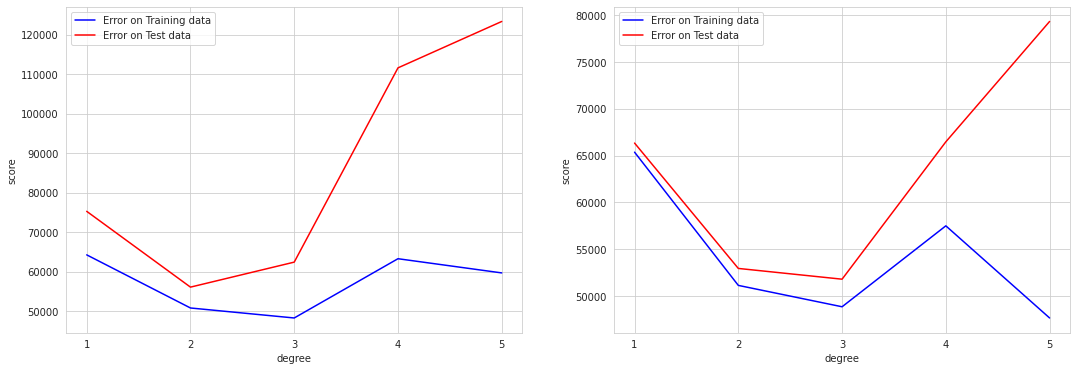

In [ ]:
# Validation curve for CV without Shuffle
plt.figure(figsize=(18,6))
degree = np.arange(1,6)

#Plot 1
train_score, val_score = validation_curve(pipe_2, X, y,
                                          param_name='poly_reg__degree',param_range=degree,scoring="neg_mean_absolute_error", cv=5)
plt.subplot(121)
plt.plot(degree, np.mean(-1*train_score, axis=1), color='blue', label='Error on Training data')
plt.plot(degree, np.mean(-1*val_score, 1), color='red', label='Error on Test data')
plt.xticks(ticks=[1,2,3,4,5])
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')

#Plot 2
train_score, val_score = validation_curve(pipe_2, X, y,
                                          param_name='poly_reg__degree',param_range=degree,scoring="neg_mean_absolute_error", cv=KFold(n_splits=5, random_state=42, shuffle=True))
plt.subplot(122)
plt.plot(degree, np.mean(-1*train_score, axis=1), color='blue', label='Error on Training data')
plt.plot(degree, np.mean(-1*val_score, 1), color='red', label='Error on Test data')
plt.xticks(ticks=[1,2,3,4,5])
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')

plt.show()

*Bonus*: after you finish this lab, go back to this question, and consider a better way to search for the best degree by using gridsearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [ ]:
# GridSearchCV without shuffle
param_grid = {'poly_reg__degree': list(range(1,11))}

grid_model = GridSearchCV(estimator = pipe_2,
                          param_grid = param_grid,
                          scoring = 'neg_mean_absolute_error',
													cv=5, verbose = 1)  

grid_model.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly_reg',
                                        PolynomialFeatures(degree=5,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lm',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                           

In [ ]:
print('Best degree for polynomial regression: '+str(grid_model.best_params_)+ '\nBest mean MAE: ' + str(-1*grid_model.best_score_))

Best degree for polynomial regression: {'poly_reg__degree': 2}
Best mean MAE: 56091.06882950844


In [ ]:
#best_pipeline = grid_model.best_estimator: returns the best pipeline to be used for predicting purpose
#best_pipeline.predict(X_test)

In [ ]:
# GridSearchCV with shuffle
param_grid = {'poly_reg__degree': list(range(1,6))}

grid_model_2 = GridSearchCV(estimator = pipe_2,
                          param_grid = param_grid,
                          scoring = 'neg_mean_absolute_error',
													cv=KFold(n_splits=5, random_state=42, shuffle=True), verbose = 1)  

grid_model_2.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly_reg',
                                        PolynomialFeatures(degree=5,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lm',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                     

In [ ]:
print('Best degree for polynomial regression: '+str(grid_model_2.best_params_)+ '\nBest mean MAE: ' + str(-1*grid_model_2.best_score_))

Best degree for polynomial regression: {'poly_reg__degree': 3}
Best mean MAE: 51796.31686084517


# Step 4: Reporting your MAE

From part 2 and part 3, which pipeline ends up with the lowest mean MAE from cross validation? And what is that MAE?

**Answer:**

Pipeline 2 which has Polynomial Features ends up having the lowest mean MAE from 5-fold CV

For this Pipeline, I implemented 2 methods for CrossValidation and got 2 results:

- First method - CV without shuffling:
  - Lowest mean MAE = 56091 for degree = 2

- Second method - CV with shuffling & random_state = 42:
  - Lowest mean MAE = 51796 for degree = 3

And the best one that I will use is Pipeline 2 with degree 3

In [ ]:
# Best pipeline - degree 3:
best_pipe_2 = Pipeline([('poly_reg', PolynomialFeatures(degree = 3, include_bias=True)),
                      ('scaler', StandardScaler()),
                      ('lm', LinearRegression())])

# Step 5: Making predictions

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	|Client 2	|Client 3|
|-----------|-----------|-----------|--------|
|Total number of rooms in home	|5 rooms	|4 rooms	|8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|

Based on your model, what price would you recommend each client sell his/her home at?


Note that at this point, you haven't had a trained model to make the prediction on this data. So we will create a pipeline and train it.

To do this question, you need to
- Redefine the best pipeline that you report in step 4
- **Fit** this pipeline on the entire dataset given at the beginning (we don't need to do train/test split here as we already know this is our best pipeline)
- Manually create a new test data including 3 clients from the table above
- Use the pipeline you have fitted to **predict** this new test data
- Save the prediction to a variable called `client_preds`

**Answer:**

My best pipeline is Pipeline 2 (degree 3). However, I will report both degree 2 & 3 to compare their results and understand why degree 3 is the best

In [ ]:
# Best pipeline - degree 2:
best_pipe = Pipeline([('poly_reg', PolynomialFeatures(degree = 2, include_bias=True)),
                      ('scaler', StandardScaler()),
                      ('lm', LinearRegression())])

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size = 0.3, random_state=42)
# best_pipe.fit(X_train2,y)
# y_test_pred2 = best_pipe.predict(X_test2)

# Best pipeline - degree 3:
best_pipe_2 = Pipeline([('poly_reg', PolynomialFeatures(degree = 3, include_bias=True)),
                      ('scaler', StandardScaler()),
                      ('lm', LinearRegression())])

# X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y, test_size = 0.3, random_state=42)
# best_pipe_2.fit(X_train3,y)
# y_test_pred3 = best_pipe_2.predict(X_test3)

In [ ]:
# Create new data:
client_data = pd.DataFrame({'Client': [1,2,3],
                            'RM': [5,4,8],
                            'LSTAT': [17,32,3],
                            'PTRATIO': [15,22,12]})
client_data = client_data.set_index('Client')

### Predict House Price:
best_model = grid_model.best_estimator_ # get best model (degree 2) from GridSearch (already fit by best_estimator_)
# Predict house price (degree 2):
client_preds = best_model.predict(client_data)

best_model_2 = grid_model_2.best_estimator_ # get best model (degree 3) from GridSearch
# Predict with degree 3
client_preds_2 = best_model_2.predict(client_data)

After you have your variable `client_preds`, run this code to visualize your predictions against the home prices (MEDV)

```python
import matplotlib.pyplot as plt
for i,price in enumerate(client_preds):
    plt.hist(y, bins = 30,color='r',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)
```

Note that 
- `client_preds` should be a vector of size 3 (since we only have 3 records in the new test set) 
- `y` should be the column MEDV in the dataset you use to train

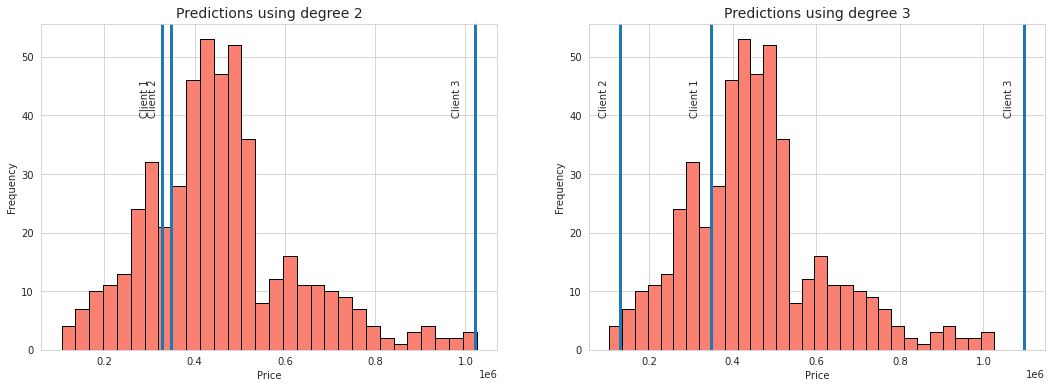

In [ ]:
# Plot Predicted price
import matplotlib.pyplot as plt
plt.figure(figsize = (18,6))
plt.subplot(121)
for i,price in enumerate(client_preds):
    plt.hist(y, bins = 30,color='salmon',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title('Predictions using degree 2', size = 14)

plt.subplot(122)
for i,price in enumerate(client_preds_2):
    plt.hist(y, bins = 30,color='salmon',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title('Predictions using degree 3', size = 14)

plt.show()

In [ ]:
client_data

,RM,LSTAT,PTRATIO
Client,,,
1,5,17,15
2,4,32,22
3,8,3,12


In [ ]:
df[(df['LSTAT'] > 30) & (df['LSTAT'] < 33)]

,RM,LSTAT,PTRATIO,MEDV
49,5.399,30.81,17.9,302400.0
368,4.368,30.63,20.2,184800.0
369,5.277,30.81,20.2,151200.0
371,5.000,31.99,20.2,155400.0
372,4.880,30.62,20.2,214200.0
382,5.453,30.59,20.2,105000.0


In [ ]:
df[(df['LSTAT'] > 30) & (df['LSTAT'] < 33)]['MEDV'].median()

170100.0

In [ ]:
print(f'Degree 2 predictions:',client_preds)
print(f'Degree 3 predictions:',client_preds_2)

Degree 2 predictions: [ 327950.18390708  347416.94630115 1020603.8898358 ]
Degree 3 predictions: [ 347348.43988885  130598.6795371  1098234.85090189]


In [ ]:
# fig,ax = plt.subplots(1,3, figsize=(18,6))

# sns.regplot(y=y_test_pred,x=y_test, ax=ax[0])
# ax[0].set_title("Actual vs Predicted prices - LinearReg")

# sns.regplot(y=y_test_pred2,x=y_test2,ax=ax[1])
# ax[1].set_yticks(ticks=[0,200000,400000,600000,800000])
# ax[1].set_title("Actual vs Predicted prices - 2nd degree PolyReg")

# sns.regplot(y=y_test_pred3,x=y_test3,ax=ax[2])
# ax[2].set_yticks(ticks=[0,200000,400000,600000,800000])
# ax[2].set_title("Actual vs Predicted prices - 3rd degree PolyReg")

# plt.tight_layout(pad=2)
# plt.show()

Do these prices seem reasonable given the values for the respective features?

**Answer:**

The predictions using Pipeline 2 with degree 3 seem more reasonable. The most remarkable difference between the two poylynomial degrees is the predicted price for Client 2

Pipeline 2 with degree 3 is more reasonable because 

  - It accounts for the high LSTAT value of client 2 better than degree 2

  - It doesn't make sense when client 2 has higher housing price than client 1 when all of its 3 features are worse than client 1's

However, in general, the predictions for both degree are pretty similar when plotting Actual vs. Predicted prices



# Step 6: Applicability

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**

- This dataset is 43 years old so it will not be relevant to today's housing price. Housing price has a tendency to increase overtime (due to inflation, increasing demand, migration from rural to urban areas,etc.). Inflation is very important to consider when using a dataset from a long time ago to predict prices

- Using only 3 features above is not sufficient to predict a housing price. In reality, house price depends on more factors including location, size, age & condition, appliances, etc.

- This model is not robust enough to be used in reality for prediction purpose. In addition to the reason above, this model uses data collected from Boston city, which has huge difference from other rural cities in terms of population density, types of economics, and Moreover, housing prices in urban areas are usually more expensive than in rural areas.

- When judging a house's price, one should always take into account its neibourhood. However, it's not recommended to depend solely on it. Sometimes, there will be exceptions where a bad neighbourhood has the best house and good neighbourhood has the worst house. A good realtor will be able to adjust the price based on combination of many features using their domain knowledge